# LinearRegression

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [3]:
# k-최근접 이웃 회귀 모델
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target) # 훈련

KNeighborsRegressor(n_neighbors=3)

In [4]:
# 특정 범위 밖의 예측이 안되는 문제 -> KNeighborsRegressor
print(knr.predict([[42]]))
print(knr.predict([[43]]))
print(knr.predict([[50]]))
print(knr.predict([[100]]))
# -> 1033.33333333

[1066.66666667]
[1033.33333333]
[1033.33333333]
[1033.33333333]


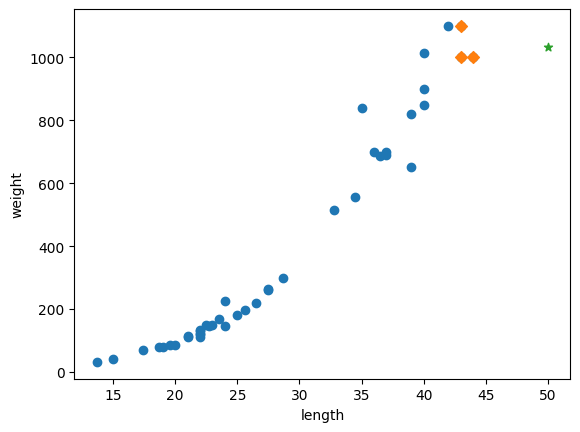

In [5]:
distances, indexes = knr.kneighbors([[50]])

import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

# 예측에 사용된 이웃 & 예측된 값
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033.33333333, marker='*')
plt.show()

# 선형회귀

In [6]:
# 대안 - 위 문제를 해결 하기 위한 선형회귀 모듈 사용
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
lr.fit(train_input, train_target)

LinearRegression()

In [8]:
lr.predict([[50]])

array([1241.83860323])

In [9]:
print(lr.predict([[100]]))

[3192.69585141]


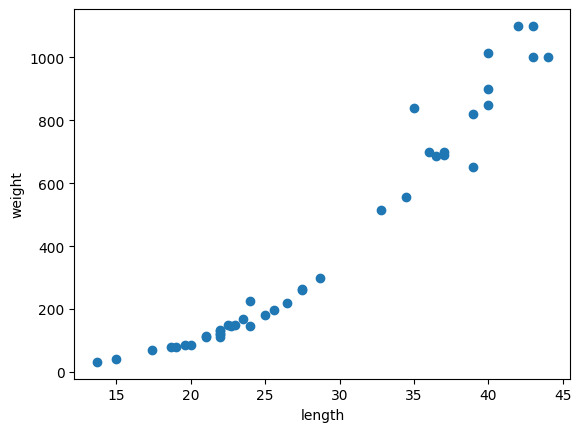

In [10]:
A = lr.coef_ # 계수
B = lr.intercept_ # 절편, 독립항

plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [11]:
A

array([39.01714496])

In [12]:
B

np.float64(-709.0186449535477)

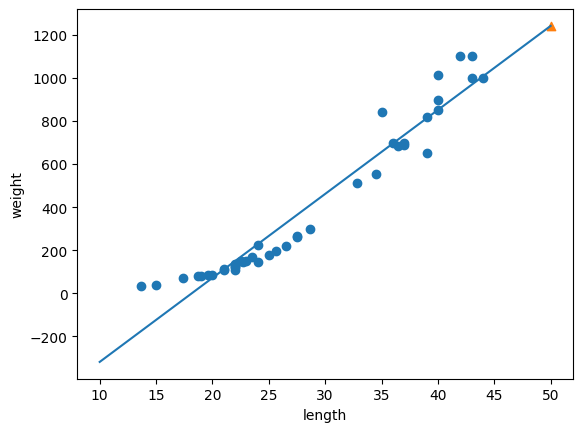

In [14]:
plt.scatter(train_input, train_target)
plt.plot([10, 50], [10 * A + B, 50 * A + B])
plt.scatter(50, 1241.83860323, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [15]:
print(lr.predict([[15]]))

[-123.7614705]


In [17]:
train_poly = np.column_stack((train_input ** 2, train_input))

In [18]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [19]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [21]:
train_poly = np.column_stack((train_input ** 2, train_input))
lr = LinearRegression()
lr.fit(train_poly, train_target)


LinearRegression()

In [23]:
lr.predict([[50 ** 2, 50]])

array([1573.98423528])

In [24]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [25]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


In [27]:
lr.coef_[0]

np.float64(1.0143321093767301)

In [28]:
lr.coef_[1]

np.float64(-21.55792497883735)

In [37]:
C = lr.intercept_
C

np.float64(116.05021078278264)

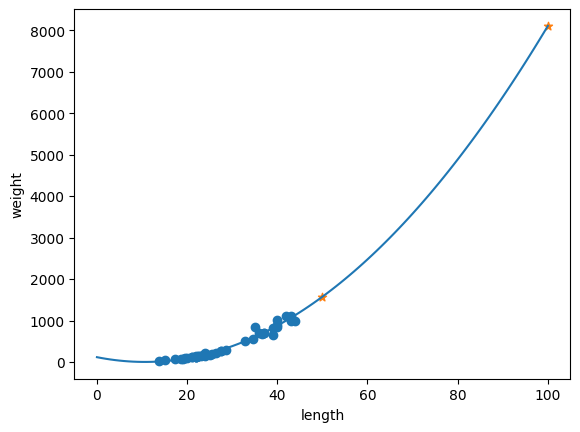

In [58]:
A = lr.coef_[0]
B = lr.coef_[1]
C = lr.intercept_

points = np.arange(0, 101)
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
# plt.plot(points, A * points**2 + B * points + C)
plt.plot(points, (A * points**2) + (B * points) + C)
# plt.scatter([50], [1574], marker='^')
plt.scatter([50, 100], [1574, 8103], marker='*')
# plt.plot(points, 1.01 * points**2 - 21.6 * points +  116.05)
# plt.plot(points, 1.01*points**2 - 21.6*points + 116.05)
plt.show()

In [52]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [56]:

print(lr.predict([[100**2, 100]]))

[8103.57880667]


In [11]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(lr, f)